#  Markov-Chains and ML-Estimations of the Transition Probabilities
The intention of this notebook is solely for me to learn about Markow-Chains

In [52]:
#Importing Libraries
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Create a mc with two states


$$
Transformation Matrix: P = \begin{matrix}
p & s_1 &  s_2 \\
s_1 & 0.5 & 0.5 \\
s_2 & 0.1 & 0.9 \\
\end{matrix}
$$

### Parameter

In [157]:
# Transformation Matrix
P = [[0.5, 0.5],[0.1,0.9]]
# First State
s0 = 0 #i = 0 is the first state i = 2 is  the second state
# Number of runs
n = 1000000

In [158]:
def mc_twostate(s0, P, n):
    state = [s0]
    for i in range(n):
        rnd_number = np.random.rand()
        if rnd_number < P[state[i]][0]:
            state.append(0) # Go or stay in state 1
        elif rnd_number > P[state[i]][0]:
            state.append(1) # Go or stay in state 2
    return state


### Ploting the states

([<matplotlib.axis.YTick at 0x1aa4cc44a58>,
 <a list of 2 Text yticklabel objects>)

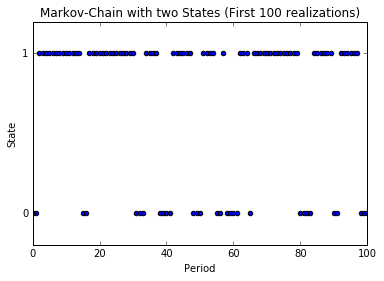

In [178]:
state_df = pd.DataFrame(mc_twostate(s0, P, n),columns=['State']) # Creating dataframe with states
plt.scatter(list(range(n+1)), state_df)
plt.title('Markov-Chain with two States (First 100 realizations)')
plt.xlabel('Period')
plt.ylabel('State')
plt.axis([0,100,-0.2,1.2])
plt.yticks([0 , 1])

### Get some stats about the chain

In [179]:
state_df.describe()

,State
count,1.000001e+06
mean,8.329962e-01
std,3.729795e-01
min,0.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


## Estimating Parameter with Maximum Likelihood

Likelihood estimator can be calculated as following:
    $$\hat{p}_{ij}=\frac{n_{ij}}{\sum_{j=1}^m{n_{ij}}}$$

### 1. Create transition count matrix

In [180]:
#Create a column with the laged values
state_df['last_State'] = state_df['State'].shift(1)

In [181]:
n00 = state_df[(state_df['State']== 0) & (state_df['last_State']== 0) ].count()['State']
n01 = state_df[(state_df['State']== 0) & (state_df['last_State']== 1) ].count()['State']
n10 = state_df[(state_df['State']== 1) & (state_df['last_State']== 0) ].count()['State']
n11 = state_df[(state_df['State']== 1) & (state_df['last_State']== 1) ].count()['State']

In [182]:
p00 = n00 / (n00 + n01)
p01 = n01 / (n00 + n01)
p10 = n10 / (n10 + n11)
p11 = n11 / (n10 + n11)

## Result: Estimated parameters for markov chain

#### Estimated Transition Probabilities

In [183]:
P_est_df = pd.DataFrame([[p00,p01],[p10,p11]], columns=['s1', 's2'], index=['s1','s2'])
P_est_df

,s1,s2
s1,0.498752,0.501248
s2,0.100494,0.899506


#### Real Transition Probabilities

In [184]:
P_df = pd.DataFrame(P, columns=['s1', 's2'], index=['s1','s2'])
P_df

,s1,s2
s1,0.5,0.5
s2,0.1,0.9


#### Differenz between estimated and real values

In [185]:
P_est_df - P_df

,s1,s2
s1,-0.001248,0.001248
s2,0.000494,-0.000494


The estimated parameter are very close the 'real' transition probabilities. 

